# Financial Transaction Pipeline
## Full Test Notebook

This notebook walks through:
- Reading input files (OCR)
- Text cleaning and extraction
- Embeddings and retrieval
- Budgeting analysis
- Trend analysis and chart generation


#### Import Required Modules

In [1]:
from graph import run_pipeline
from state.graph_state import initialize_state
import json
import os
from dotenv import load_dotenv

load_dotenv()

c:\Users\jaind\OneDrive\Documents\Study Material\College\Sem 3\Introduction to LLM\Projects\Capstone\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

#### Configure Budget Settings

In [2]:
budget_cfg = {
    "food": 100.0,
    "groceries": 300.0,
    "transport": 150.0,
    "entertainment": 120.0
}

use_llm = bool(os.getenv("OPENAI_API_KEY"))

print(f"Budget Configuration: {budget_cfg}")
print(f"LLM Enabled: {use_llm}")

Budget Configuration: {'food': 100.0, 'groceries': 300.0, 'transport': 150.0, 'entertainment': 120.0}
LLM Enabled: True


#### Run the Pipeline

In [3]:
print("\n=== Running Full Pipeline ===\n")

final_state = run_pipeline(
    data_dir="data",
    budget_cfg=budget_cfg,
    use_llm=use_llm,
    query="Starbucks",  
    top_k=3
)

print("\n=== Pipeline Complete ===\n")


=== Running Full Pipeline ===

[1] read_inputs -> files: 4
[2] run_ocr -> ocr_output keys: 4
[3] clean_text -> sms blocks: 6, bank blocks: 1
[4] run_extract -> extracted_count: 120
[5] run_embeddings -> embedded_count: 120

[6] Retrieval sample for query: 'Starbucks' -> 3 results
 - txn::bank.txt::pn::46 | STARBUCKS #404 | 9.75
 - txn::bank.txt::pn::45 | STARBUCKS #404 | 12.0
 - txn::bank.txt::pn::42 | STARBUCKS #404 | 8.5

=== Pipeline Complete ===



#### Budget Results

In [4]:
budget_results = final_state.budget_results

print(f"Budgeting results (counted txns): {budget_results.get('count_indexed_txns')}")
print("\nTotal by category:")
print(json.dumps(budget_results.get("total_by_category", {}), indent=2))

Budgeting results (counted txns): 119

Total by category:
{
  "other": 1994.97,
  "rent": 1160.0,
  "transport": 442.0,
  "groceries": 1162.0,
  "food": 504.13,
  "utilities": 866.9,
  "entertainment": 1381.9,
  "shopping": 1255.36,
  "gym": 225.0,
  "health": 28.0,
  "travel": 450.0
}


#### Top Categories

In [5]:
print("Top categories:")
for t in budget_results.get("top_categories", []):
    print(f" - {t['category']}: {t['amount']}")

Top categories:
 - other: 1994.97
 - entertainment: 1381.9
 - shopping: 1255.36
 - groceries: 1162.0
 - rent: 1160.0


#### Budget Violations

In [6]:
if budget_results.get("violations"):
    print("Budget violations detected:")
    for v in budget_results["violations"]:
        print(f" - {v['month']} {v['category']}: spent {v['spent']} limit {v['limit']} excess {v['excess']}")
else:
    print("No budget violations detected (for configured limits).")

Budget violations detected:
 - 2025-08 groceries: spent 334.9 limit 300.0 excess 34.9
 - 2025-08 food: spent 151.75 limit 100.0 excess 51.75
 - 2025-08 entertainment: spent 475.96 limit 120.0 excess 355.96
 - 2025-09 food: spent 106.9 limit 100.0 excess 6.9
 - 2025-09 entertainment: spent 321.99 limit 120.0 excess 201.99
 - 2025-10 entertainment: spent 305.99 limit 120.0 excess 185.99
 - 2025-10 groceries: spent 410.4 limit 300.0 excess 110.4
 - 2025-10 food: spent 150.5 limit 100.0 excess 50.5
 - 2025-11 transport: spent 159.0 limit 150.0 excess 9.0
 - 2025-11 entertainment: spent 277.96 limit 120.0 excess 157.96


#### LLM-Generated Budget Summary

In [7]:
if getattr(final_state, 'budget_report', None):
    print("Budget Summary (LLM):")
    print(final_state.budget_report)

if getattr(final_state, 'budget_recommendations', None):
    print("\nBudget Recommendations:")
    for r in final_state.budget_recommendations:
        print(f" - {r}")

Budget Summary (LLM):
You are overspending mainly on entertainment, groceries, and food across multiple months, with occasional transport overages.

Budget Recommendations:
 - Cut entertainment expenses by limiting outings or subscriptions, especially in August and September.
 - Reduce grocery spending by planning meals and avoiding impulse buys, notably in October and August.
 - Control food expenses by dining out less and cooking at home, focusing on August and October.


#### Chart Outputs

In [8]:
charts = final_state.chart_paths
print("Charts saved:")
for k, v in charts.items():
    print(f" - {k}: {v}")

Charts saved:
 - top_categories_trend: data\charts\top_5_categories_trend.png
 - monthly_totals: data\charts\monthly_totals.png



Top Categories Trend:


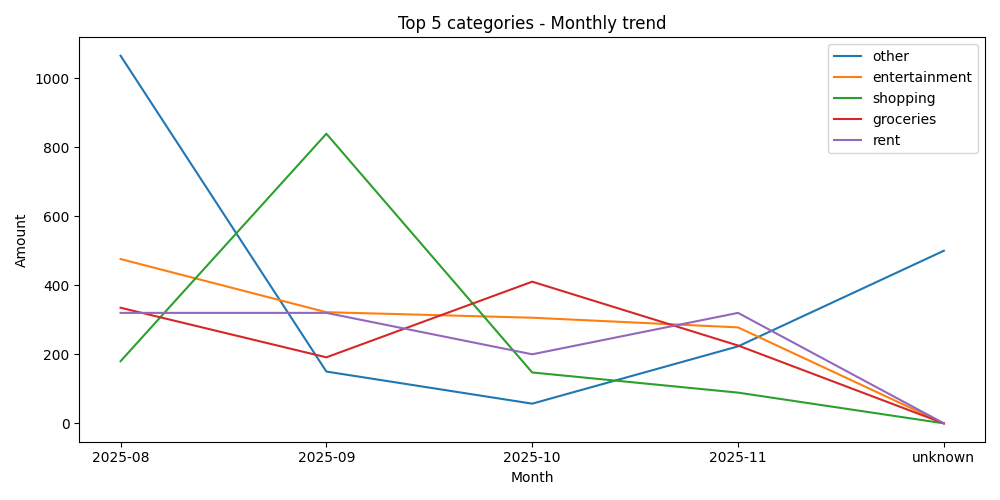


Monthly Totals:


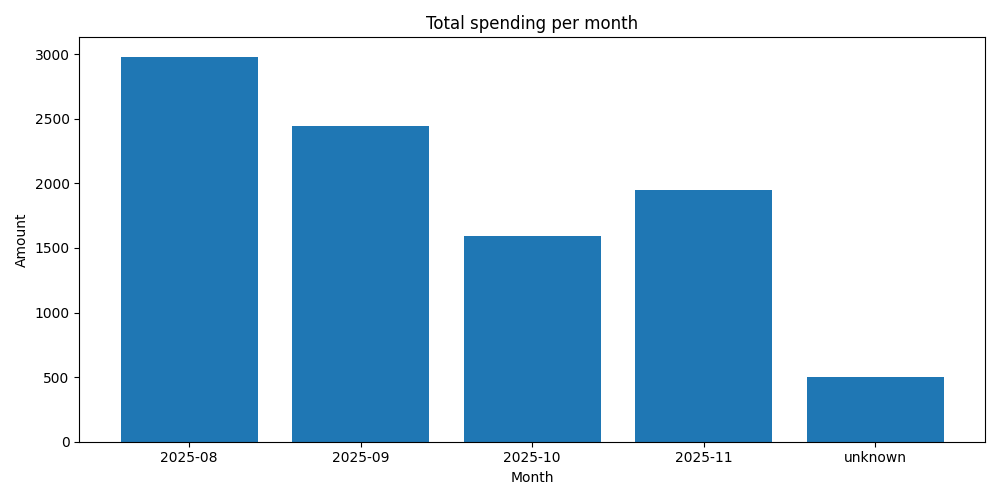

In [9]:
from IPython.display import Image, display
import os

for chart_name, chart_path in charts.items():
    if os.path.exists(chart_path):
        print(f"\n{chart_name.replace('_', ' ').title()}:")
        display(Image(filename=chart_path))
    else:
        print(f"\nChart not found: {chart_path}")